* 원본커널 : https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

# Introduction: Home Credit Default Risk Competition

This notebook is intended for those who are new to machine learning competitions or want a gentle introduction to the problem. I purposely avoid jumping into complicated models or joining together lots of data in order to show the basics of how to get started in machine learning! Any comments or suggestions are much appreciated.

이 노트북은 머신러닝 컴피티션이 처음이거나 이번 주제에 대한 가벼운 시작을 하기를 원하는 사람을 위한 것입니다. 머신러닝을 어떻게 시작하는지에 대한 기본을 보여주기 위해 갑자기 복잡한 모델을 이용하는 것이나 많은 데이터를 한번에 조인하는 것을 지양했습니다.




In this notebook, we will take an intial look at the Home Credit default risk machine learning competition currently hosted on Kaggle. The objective of this competitiom is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supurvised classification task.

이 노트북에서는 Home Credit Default Risk 컴피티션을 살펴볼 것입니다. 이 컴피티션의 목적은 대출 데이터를 바탕으로 대출 신청자들이 대출을 상환할 수 있는지 여부를 예측하는 것입니다. 전형적인 지도학습 분류문제 입니다.

* Supervised : The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features.
 - Supervised: 트레이닝 데이터에 label이 포함되어 있고, feature로부터 label을 예측하기 위해 모델을 학습시키는 것이 목표
* Classification : The label is a binary variable, 0 (will repay loan on time), 1(will have difficulty repaying loan)
 - Classification : label은 binary variable 이며 0은 제때 대출을 상환하는 사람, 1은 대출 상환에 어려움을 겪는 사람.

# Data

The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbankeed population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help tehm in this task.

Home Credit은 은행에서 소외받는 계층에 대한 대출을 제공해주는 서비스를 제공해주는 기업입니다. 고객의 대출 상환 여부는 그들의 비지니스에 매우 중요합니다.

There are 7 different sources of data:

* application_train / application_test : the main traning and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR.


     - application_train / application_test : Home Credit의 실행된 대출의 정보가 있는 main data로 train/test 데이터가 존재. 각각의 대출이 한 행을 이루며 SK_ID_CURR이라는 feature로 식별된다.

* bureau : data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credit.


     - Bureau : 고객이 타기관으로부터 받은 신용과 관련된 데이터, 각각의 신용은 하나의 행으로 나타나며, 하나의 대출은 여러 신용을 가질 수 있다.
     
     
* bureau_balance : monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length

    
    - bureau_balance : 이전 신용에 대한 월별 데이터, 하나의 행은 매월 이전 신용을 나타낸다. 하나의 이전 신용은 여러개의 행을 가질 수 있으며, 각각이 매월의 신용의 길이를 나타낸다?.
    
    
* previous_application: previous applications for loans at Home Credif of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.


    - previous_application : application data에 있는 고객의 이전 loans application 데이터,. 각각의 행은 하나의 과거 application을 나타내며 SK_ID_PREV로 식별된다.
    
    
* POS_CASH_BALANCE : monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.


     - POS_CASH_BALANCE : Home Credit 의 고객이 가지고 있는 과거 cash loan 이나 POS의 월별 기록, 각각의 행은 cash loan 이나 POS의 한달을 나타낸다. 하나의 과거 loan은 여러개의 행을 가질 수 있다.
  
  
* credit_card_balance : monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.


    - credit_card_balance : 고객이 Home credit에 가지고 있는 이전 신용카드 월별 데이터. 각각의 행은 신용카드 잔고의 한달 기록이며, 하나의 신용카드는 여러 행을 가질 수 있다.
    

* installments_payment : payment history for previous loans at Home Credit. There is one row for every made payment one row for every missed payment.


    - Home Credit의 과거 대출에 대한 지불 기록. 지불 기록을 나타낸 행도 있고, 지불되지못한 행도 있다.

<img src = 'https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png'>

Moreover, we are provided with the definitions of all the columns (HomeCredit_columns_description.csv) and an example of the expected submission file.

* 각 컬럼을 설명하는 HomeCredit_columns_description.csv 파일이 있고, submission file에 대한 예시가 있습니다.

In this notebook, we will stick to using only the main application training and testing data. Although if we want to have any hope of seriously competing, we need to use all the data, for now we will stick to one file which should be more manageablel. This will let us establish a baseline that we can then improve upon. With these projects, it's best to build up an understanding of the problem a little at a time rather than diving all the way in and getting completely lost!

 * 이 노트북에서는 여러 파일들 중 application만을 활용할 것임

## Metric : ROC AUC

Once we have a grasp of the data (reading through the column descriptions helps immensely), we need to understand the metric by which our submission is judged. In this case, it is a common classification metric known as the ```Receiver Operating Characteristic Area Under the Curve (ROC AUC```, also sometimes called AUROC).

* 데이터를 대략 이해했다면, 평가방법을 이해해야 합니다. 이번 케이스에는 ROC AUC를 사용합니다.

The ROC AUC may sound intimidating, but it is relatively straightforward once you can get your head around the two individual concepts. The ```Reciever Operating Characteristic (ROC) curve``` graphs the```true positive rate``` versus the ```false positive rate```:

* ROC Curve는 true posivite rate(재현율)과 false positive rate(위양성률)을 이해하면 쉽게 알 수 있습니다.


<img src = 'http://www.statisticshowto.com/wp-content/uploads/2016/08/ROC-curve.png'>

* A single line on the graph indicates the curve for a single model, and movement along a line indicates changing the threshold used for classifying a positive instance. 

그래프의 단일 선은 단일 모델의 곡선을 나타내며 선을 따라 이동하면 양의 인스턴스(instance)를 분류하는 데 사용되는 임계값이 변경됨을 나타낸다.

* The threshold starts at 0 in the upper right to and goes to 1 in the lower left.

임계값은 오른쪽 상단에서 0으로 시작하여 왼쪽 하단의 1로 이동한다.

* A curve that is to the left and above another curve indicates a better model.

다른 곡선의 왼쪽과 위에 있는 곡선은 더 나은 모형을 나타낸다

* For example, the blue model is better than the red model, which is better than the black diagonal line which indicates a naive random guessing model.

예를 들어 파란색 모델은  빨간색 모델보다 낫고, 빨간색 모델은 naive random guessing 모델을 나타내는 검은색 대각선보다 낫다.

* The Area Under the Curve (AUC) explains itself by its name! It is simply the area under the ROC curve. (This is the integral of the curve.) 

AUC는 말그대로  ROC 곡선 하단의 면적을 나타냅니다.(곡선의 적분)

* This metric is between 0 and 1 with a better model scoring higher. A model that simply guesses at random will have an ROC AUC of 0.5.

이 평가방법은 0과 1의 값을 가지며 더 나은 모델일수록 점수가 높습니다. random하게 단순 추측한 모델은 0.5를 가지게 됩니다.

* When we measure a classifier according to the ROC AUC, we do not generation 0 or 1 predictions, but rather a probability between 0 and 1. 

ROC AUC로 평가할 떄 0, 1을 예측하는게 아니라 확률을 예측합니다.

* This may be confusing because we usually like to think in terms of accuracy, but when we get into problems with inbalanced classes (we will see this is the case), accuracy is not the best metric. 

accuracy(정확도)를 생각했을 때 다소 혼란스러울 수 있지만 예측하고자 하는 값의 분포가 imbalnced한  경우에는 accuracy가 최고의 방법이 되지 못합니다.

* For example, if I wanted to build a model that could detect terrorists with 99.9999% accuracy, I would simply make a model that predicted every single person was not a terrorist.

테러리스트를 99.9999%의 정확도로 선별해내는 모델을 만들고자 하면, 단순히 모든 사람이 테러리스트가 아니라고 예측하는 모델을 만들면 됩니다.


* Clearly, this would not be effective (the recall would be zero) and we use more advanced metrics such as ROC AUC or the F1 score to more accurately reflect the performance of a classifier. 

명백히 이것은 효율적이지 못합니다(재현율이 0이 될 것입니다.) 우리는 분류기 성능을 보다 정확하게 반영하기 위하여 ROC AUC나 F1 Score같은 보다 나은 방식의 평가방법을 사용할 것입니다.

* A model with a high ROC AUC will also have a high accuracy, but the ROC AUC is a better representation of model performance.

높은 ROC AUC 점수를 기록한 모델은 높은 accuracy(정확도)를 가지면서 model performance도 뛰어납니다.

Not that we know the background of the data we are using and the metric to maximize, let's get into exploring the data. In this notebook, as mentioned previously, we will stick to the main data sources and simple models which we can build upon in future work.

* 이제 data에 대한 기본지식과 평가방법에 대해 알았으니, 데이터에 대해 EDA를 해봅시다. 이 노트북에서는 우리는 main data과 간단한 모델을 사용할 것입니다.

# Imports

* We are using a typical data science stack : numpy, pandas, sklearn, matplotlib

전형적인 data science stack 을 사용할 것입니다 : numpy, pandas, sklearn, matplotlib

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system management
import os

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotllb and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
sns.set(font_scale=1.5)

# Read in Data

* First, we can list all the available data files. There are a total of 9 files: 1 main file for training (with target) 1 main file for testing (without the target), 1 example submission file, and 6 other files containing additional information about each loan.

먼저 사용가능한 데이터 파일을 나열할 수 있습니다. 총 9개의 파일이 있습니다. 훈련을 위한 1개의 메인 파일(target 포함)과 테스트를 위한 1개의 메인 파일(target 미포함), 1개의 submission file 예시, 대출에 관한 부가적인 정보를 담고있는 6개의 파일이 있습니다.

In [2]:
os.getcwd() #현재 폴더경로 찾기 

'/Users/chaebogook/Python/Kaggle/Binary Classification_Home Credit Default Risk'

In [3]:
os.listdir("/Users/chaebogook/Python/Kaggle/Binary Classification_Home Credit Default Risk")

['application_test.csv',
 'log_reg_baseline.csv',
 '.DS_Store',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'random_forest_baseline.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'random_forest_baseline_engineered.csv',
 'bureau.csv',
 '.ipynb_checkpoints',
 '필사커널_Start Here - A Gentle Introduction_190708.ipynb',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [4]:
# traning data
app_train = pd.read_csv('application_train.csv')
print('Traning data shape', app_train.shape)
app_train.head()

Traning data shape (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


* The training data has 307511 observations (each one a seperate loan) and 122 features (variables) including the ```Target``` (the label we want to predict).

training data는 307,511 관측치(각각은 개별 대출)과 ```TARGET```(예측하고자 하는 값)을 포함한 122개의 feature(변수)가 있습니다.

In [5]:
# Testing data features
app_test = pd.read_csv('application_test.csv')
print('Test data shape', app_test.shape)
app_test.head()

Test data shape (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


* The test set is considerable smaller and lacks a ```Target``` column.

테스트 셋은 상대적으로 작고, ```Target```컬럼이 없습니다.

# Exploratory Data Analysis

* Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

EDA는 통계량을 계산하고 수치를 만들어 데이터 안의 트렌드, 이상현상, 패턴, 관계를 찾아내기 위한 개방형 프로세스 입니다. EDA의 목표는 데이터가 우리에게 무엇을 말해줄 수 있는지를 배우는 것입니다. 일반적으로는 높은 수준에서의 오버뷰로 시작되고, 데이터의 흥미로운 영역을 찾아 특정 영역으로 좁혀나갑니다. 발견된 결과는 그 자체로 흥미롭고, 어떤 feature를 사용될지 결정하는데 도움을 주는 등 우리의 모델링 선택에 정보를 제공합니다..

## Examine the Distribution of the Target Column

* The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

Target은 예측하고자 하는 대상입니다 : 0은 대출이 제때 상환되었음을 나타내고, 1은 고객이 대출 상환을 잘 하지 못하는 것을 나타냅니다. 우리는 먼저 각각의 카테고리에 속한 대출의 수를 살펴볼 것입니다.

In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

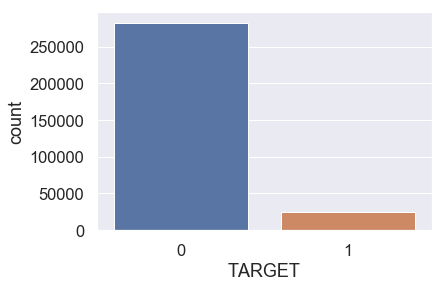

In [7]:
# app_train['TARGET'].astype(int).plot.hist();
sns.countplot(data=app_train, x='TARGET')

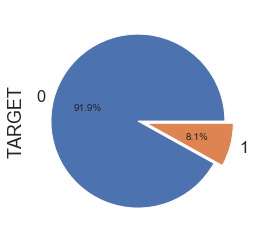

In [8]:
app_train['TARGET'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%')

* From this information, we see this is an imbalanced class problem. There are far more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

이 도표를 통해 우리는 imbalanced class problems을 확인할 수 있습니다. 제때 상환되는 대출이 그렇지 못한 대출보다 훨씬 많습니다. 더 정교한 머신러닝 모델을 활용하면, 우리는 이런 불균형을 반영하기 위해 클래스에 가중치를 둘 수 있습니다.

http://www.chioka.in/class-imbalance-problem/

## Examine Missing Values

Next we can look at the number and percentage of missing values in each column.
각 컬럼 missing value의 수와 비율을 확인해봅시다.

In [9]:
# Function to calculate missing values by columns

def missing_values_table(df):
    # Total Missing Values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the column
    mis_val_table_ren_columns = mis_val_table.rename( columns = 
                                                     { 0 : 'Missing Values', 1 : '% of Total values'} )
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0]\
                                                                        .sort_values('% of Total values', ascending = False).round(1)
    
    # print some summary information
    print('Your selected dataframe has ' + str(df.shape[1])+' columns.\n'
             'There are '+str(mis_val_table_ren_columns.shape[0]) + ' columns that have missing values')
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [10]:
# Missing Value Statitstics
missing_values = missing_values_table(app_train)
missing_values

Your selected dataframe has 122 columns.
There are 67 columns that have missing values


,Missing Values,% of Total values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


* When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle missing values with no need for imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

머신러닝 모델을 만들 때, 우리는 이 missing value들을 채워넣어야 합니다.(imputation이라 합니다.) 뒤의 작업에서 우리는 imputation을 할 필요 없이 missing value를 다룰 수 있는 XGBoost를 모델로 사용할 것입니다. 다른 방법은 결측치 비율이 높은 컬럼을 drop시키는 것이지만, 그 컬럼이 우리의 모델에 도움이 될지는 알 수 없습니다. 그렇기 때문에 모든 컬럼을 유지할 것입니다.

## Column Types

* Let's look at the number of columns of each data type. ```int64``` and ```float64``` are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features. .

각각의 데이터 타입에 따른 컬럼 수를 확인해봅시다. ```int64```와 ```float64```는 이산형 또는 연속형의 숫자형 변수이고, object컬럼은 문자열이고 categorical 한 feature 입니다.

In [11]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

* Let's now look at the number of unique entries in each of the object (categorical) columns.

object(categorical) 열의 유니크한 값의 수를 확인해봅시다.

In [12]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

* Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!

대부분의 categorical 변수들은 적은 수의 unique한 값을 가지고 있습니다. 이런 categorical한 변수를 다룰 방법을 찾아야 합니다.

## Encoding Categorical Variables

Before we go any further, we need to deal with pesky categorical variables. A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

더 들어가기 전에, 우리는 categorical 변수를 다루어야 합니다. 머신러닝 모델은 카데고리 변수를 그대로 처리할 수 없습니다.(예외적으로 LightGBM 등의 모델은 가능합니다.) 그렇기 때문에 이러한 변수들을 숫자로 인코딩할 방법을 찾아야 합니다. 두 가지 방법이 있습니다.

* Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below

각각의 유니크한 카테고리 값에 정수를 부여하는 것입니다. 새로운 컬럼이 만들어지지 않습니다.

<img src = 'https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/label_encoding.png'>

* One-hot encoding: create a new column for each unique category in a categorical variable. Each observation receIves a 1 in the column for its corresponding category and a 0 in all other new columns.

유니크한 카테고리 값 각각에 대해 새로운 컬럼을 만듭니다. 각각의 관측치는 해당 카테고리 값일 떄 1, 아니면 0으로 표시됩니다.

<img src = 'https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/one_hot_encoding.png'>

* The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category. In the example above, programmer recieves a 4 and data scientist a 1, but if we did the same process again, the labels could be reversed or completely different. The actual assignment of the integers is arbitrary. Therefore, when we perform label encoding, the model might use the relative value of the feature (for example programmer = 4 and data scientist = 1) to assign weights which is not what we want. If we only have two unique values for a categorical variable (such as Male/Female), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the safe option.

label encoding의 문제점은 각 카테고리에 임의의 순서를 부여한다는 것입니다. 각 카테고리 값에 부여된 숫자는 임의값이며 카테고리의 어떤 특성을 반영하는 것이 아닙니다. 위의 예에서 programmer는 4, data scientiest는 1을 부여 받았습니다. 하지만 같은 프로세스를 다시했을 때, 라벨이 완전히 달라질 수도 있습니다. 실제 각 정수값을 부여하는 것은 임의입니다. 그렇기 때문에 label encoding을 할 때 feature의 상대적인 값에 대해 원하지 않는 가중치를 부여할 수도 있습니다.우리가 성별과 같이 두개의 유니크한 값을 가진 categorical value가 있다고 하면, label encoding을 사용해도 괜챃습니다. 하지만 두개보다 많은 유니크한 값을 가지고 있다면, one-hot-encoding이 안전한 방법입니다.

* There is some debate about the relative merits of these approaches, and some models can deal with label encoded categorical variables with no issues. Here is a good Stack Overflow discussion. (https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor ) I think (and this is just a personal opinion) for categorical variables with many classes, one-hot encoding is the safest approach because it does not impose arbitrary values to categories. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by PCA or other dimensionality reduction methods to reduce the number of dimensions (while still trying to preserve information).

각각의 방법의 상대적인 이점에 대한 토론들이 있고, 몇몇 모델은 label encoding된 것을 별 문제 없이 사용할 수 있습니다. Stackoverflow의 이 디스커션은 좋은 참고가 될 것입니다. 제 생각에는 많은 class가 존재하는 categorical variables에는 one-hot-encoding이 좋은 옵션입니다. 하지만 단점은 feature가 너무 많아질 수 있다는 것입니다. 이 문제를 다루기 위해 원한 인코딩 후에 PCA나 다른 방법을 사용하여 dimension의 수를 줄일 수 있습니다.

* In this notebook, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories. This process may need to change as we get further into the project, but for now, we will see where this gets us. (We will also not use any dimensionality reduction in this notebook but will explore in future iterations).

이 노트북에서는 2개의 값만을 지난 category에 Label Encoding을 사용할 것이고 그 외는 one-hot-encoding을 사용할 것입니다. 이 프로젝트를 수행하면서 이런 프로세스에 변화를 줄 필요는 있지만 지금은 이것이 우리에게 어떤 영향을 미치는지 볼 것입니다. (그리고 우리는 dimension 감소를 사용하지 않고, 향후 이것에 대해 다뤄볼 것입니다.) 

### Label Encoding and One-Hot Encoding

* Let's implement the policy described above: for any categorical variable (```dtype == object```) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.

2개의 값을 지난 categorical 변수에는 label encoding을 , 그 외에는 one-hot-encoding을 사용할 것입니다.

* For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas ```get_dummies(df)``` function.

label-encoding을 위해 우리는 사이킷런의 LabelEncoder를 사용 할 것이고, one-hot-encoding을 위해 판다스의 ```get_dummies``` 함수를 사용할 것입니다.

In [13]:
# Create a label encoder project

le = LabelEncoder()
le_count = 0

# Iterate through columns
for col in app_train:
    if app_train[col].dtype == 'object':
        
        # if 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            
            # train on the training data
            le.fit(app_train[col])
            
            #transform both traning and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [14]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Traning Feature shape: ', app_train.shape)
print('Testing Feature shape: ', app_test.shape)

Traning Feature shape:  (307511, 243)
Testing Feature shape:  (48744, 239)


### Aligning Training and Testing Data

* There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set ```axis = 1``` to align the dataframes based on the columns and not on the rows!

training과 testing data는 같은 feature를 가져야합니다. 원핫인코딩이 더 training data에서 더 많은 컬럼을 만들어 냈는데, 몇몇 categorical variables가 testing data에는 없는 category를 가지고 있기 때문입니다. testing data에 없는 컬럼을 training data에서 제거하기 위해, 우리는 dataframe을 조정해야 합니다. 먼저 target 컬름을 tranining data로부터 추출합니다.(왜냐하면 testing data에는 존재하지 않고,  우리는 이 정보를 보존할 필요가 있기 때문입니다.) 조정을 할 때, 우리는 data frame이 행이 아니라 열에 의해 정렬을 하도록 ```axis = 1``` 을 반드시 설정해야 합니다.

In [15]:
train_labels = app_train['TARGET']

# Aling the traning and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis =1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Traning Feature shape: ', app_train.shape)
print('Testing Feature shape: ', app_test.shape)

Traning Feature shape:  (307511, 240)
Testing Feature shape:  (48744, 239)


* The training and testing datasets now have the same features which is required for machine learning. The number of features has grown significantly due to one-hot encoding. At some point we probably will want to try dimensionality reduction (removing features that are not relevant) to reduce the size of the datasets.

training과 testing 데이터 셋이 이제 같은 feature를 가지고 있습니다. 원핫인코딩 때문에 feature의 수가 상대적으로 늘었습니다. 추후에 우리는 아마 dimensionality reduction을 시도할 것입니다.

# Back to Exploratory Data Analysis

### Anomalies

* One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the ```describe``` method. The numbers in the ```DAYS_BIRTH``` column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

EDA를 할 때 우리가 신경써야 할 하나의 문제는 데이터의 이상입니다. 오타나 측정의 오류일 수도 있고, 극단치 때문일 수도 있습니다. 이런 이상치를 정량적으로 지원하는 방법 중 하나는 ```describe``` 메소드를 사용하여 각 컬럼의 통계값을 보는 것입니다. ```DAYS_BIRTH```의 값은 대출 실행일에 따라 상대적으로 기록되기 때문에 음수 입니다. 이러한 통계를 연도별로 보려면 -1을 곱하고 일수로 나누는 것입니다.

In [16]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

* Those ages look reasonable. There are no outliers for the age on either the high or low end. How about the days of employment?

연령값은 그럴듯 해보입니다. 상하방의 연령 값에 아웃라이어가 없습니다. days_of_employed도 봅시다.

In [17]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

* That doesn't look right! The maximum value (besides being positive) is about 1000 years!

최대값이 양수인 것은 그렇다고 치더라도, 1000년이나 된다.

Text(0.5, 0, 'Days Employed')

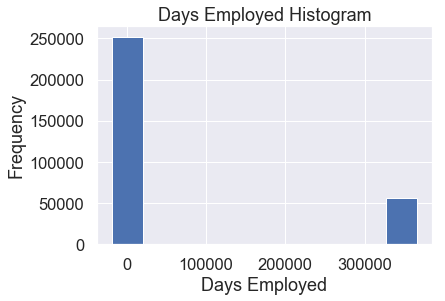

In [18]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employed Histogram')
plt.xlabel('Days Employed')

* Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

단순한 의구심에서 벗어나, 변친적인 고객들의 서브셋을 만들어서 그들이 다른 고객들에 비해 더 높거나 낮은 채무 불이행률을 가지고 있는지 살펴봅시다.

In [19]:
anom = app_train[app_train['DAYS_EMPLOYED']==365243]
non_anom =app_train[app_train['DAYS_EMPLOYED']!=365243]

print('The non-anomalies default on %0.2f%% of loans' % (100* non_anom['TARGET'].mean()))
print('The anomalies defalut on %0.2f%% of loans' % (100*anom['TARGET'].mean()))
print('The are %d anomalous "DAYS_EMPLOYED"' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies defalut on 5.40% of loans
The are 55374 anomalous "DAYS_EMPLOYED"


* Well that is extremely interesting! It turns out that the anomalies have a lower rate of default.

변칙적인 데이터를 가진 것들이 더 낮은 채무 불이행률을 가지고 있습니다.

* Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

변칙적인 것들을 다루는 것은 정해진 규칙이 아닌 그때그때의 상황에 달려있습니다. 가장 안전한 방법은 변칙적인 것들은 missing value로 두고, (Imputation을 사용해서) 머신러닝 전에 채우는 것입니다. 이 경우에는 변칙적인 값들이 모두 같은 값을 가지고 있었기 때문에, 이런 모든 대출이 어떤 공통점을 가지고 있을 수 있으므로 동일한 값으로 채워넣으려고 합니다. 변칙적인 값들은 중요해보여서, 이 값들을 채우고 머신러닝 모델에 그것을 알려주고자 합니다. 이를 변칙적인 값들을 np.nan으로 채우고 새로운 boolean column을 만들어서 그 값이 변친적인지 아닌지 나타내도록 할 것입니다.

In [20]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace =True)

Text(0.5, 0, 'DAYS_EMPLOYED')

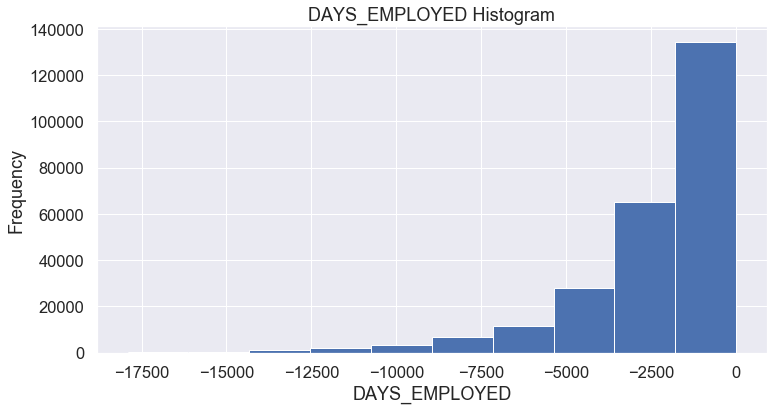

In [21]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'DAYS_EMPLOYED Histogram')
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.xlabel('DAYS_EMPLOYED')

* The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (because we will have to fill in the nans with some value, probably the median of the column). The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.

분포는 예상할 수 있는 것과 일치하는 모양을 나타내고 있습니다. 그리고 우리는 변칙적이었던 값을 구분하기 위한 새로운 컬럼을 만들었습니다. (나중에 우리는 이 nan 값을 중간값 등의 다른 값으로 채워야하기 때문). 데이터 프레임의 다른 DAYS와 관련된 컬럼은 특별한 아웃라이어 없는 모양새를 나타내고 있습니다.

* As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with np.nan in the testing data

중요한 것은, 우리가 훈련 데이터셋에 하는 모든 작업들은 테스트 데이터셋에도 수행을 해야합니다. 테스트 데이터 셋에서 새 컬럼을 만들고 np.nan값을 채워줘야 합니다.

In [22]:
app_test['DAYS_EMPLOYED_ANOM']  = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243 : np.nan}, inplace =True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


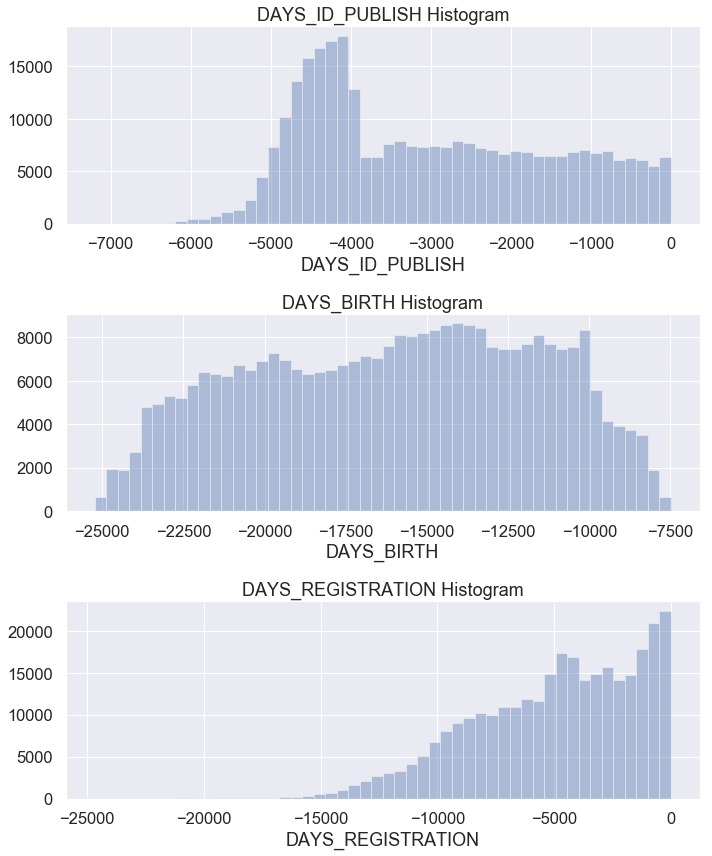

In [23]:
plt.figure(figsize=(10, 12))
for i, source in enumerate(['DAYS_ID_PUBLISH','DAYS_BIRTH','DAYS_REGISTRATION']):
    plt.subplot(3, 1, i+1)
    
    sns.distplot(app_train[source], hist=True, kde=False).set_title('%s Histogram' % source)

plt.tight_layout(h_pad=2)

### Corrrelations

* Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

categorical value와 outlier를 처리했으니 EDA를 계속 진행합니다. 데이터를 이해하는 하나의 방법은 feature와 target간의 상관관계를 살펴보는 것입니다. 우리는 Pearson correlation coefficient를 데이터프레임의 ```.corr``` 메소드를 이용하여 계산할 수 있습니다.

* The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

상관계수는 feature의 상관성(relevance)를 나타내는 최고의 방법은 아니지만, 데이터 안의 가능한 관계에 대한 아이디어를 줍니다. 상관관계의 절대값에 대한 일반적인 해석은 다음과 같습니다.

 - 0.00-0.19 “very weak”
 - 0.20-0.39 “weak”
 - 0.40-0.59 “moderate” 
 - 0.60-0.79 “strong”
 - 0.80-1.0 “very strong”

In [24]:
# FInd correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

In [25]:
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))

print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

* Let's take a look at some of more significant correlations: the ```DAYS_BIRTH``` is the most positive correlation. (except for ```TARGET``` because the correlation of a variable with itself is always 1!) Looking at the documentation, ```DAYS_BIRTH``` is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

중요한 상관관계들을 살펴봅시다. ```DAYS_BIRTH```가 가장 높은 양의 상관관계를 가지고 있습니다.(스스로와의 상관관계는 항상 1이기 때문에```TARGET```은 제외). documentation을 참고 하면 ```DAYS_BIRTH```는 대출 신청시점의 날짜로 계산한 나이(음수값) 입니다. 상관관계가 양이고, 이 feature의 값은 음수이기 때문에, 나이가 많을 수록 채무 불이행 확률이 낮다는 것을 의미 합니다.(TARGET ==0). 좀 헷갈리기 때문에, 우리는 이 feature에 절대값을 씌워주면, 상관관계가 음으로 나타날 것입니다.

### Effect of Age on Repayment

In [26]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

* As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

고객의 연령과 TARGET은 음의 상관관계에 있고, 이것은 고객의 연령이 증가할 수록 대출을 잘 상환하는 경향이 있다는 것을 의미 합니다.

* Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

이 변수를 살펴봅시다. 먼저 우리는 연령의 히스토그램을 그려볼 수 있습니다. x축을 연으로 환산한 연령을 두어서 보다 이해하기 쉽게 만들겠습니다.

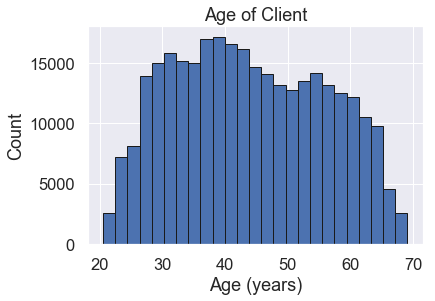

In [27]:
# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor='k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)') ; plt.ylabel('Count');

* By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

분포만 보면 아웃라이어가 없다는 것 말고는 특별한 점은 없습니다. 연령의 TARGET에 대한 영향을 시각화하기 위해 TARGET의 값에 따라 색을 달리하여 kernel density estimation plot을 그려볼 것입니다. kernel density estimation plot은 단일 변수의 분포를 보여주고, 평활화된 히스토그램으로 볼 수 있습니다.(각 데이터 포인트에서 커널, 보통 가우시안을 계산한 다음 모든 개별 커널을 평균화하여 하나의 평활 곡선을 산출합니다.) 우리는 seaborn의 kde plot을 사용할 것입니다.

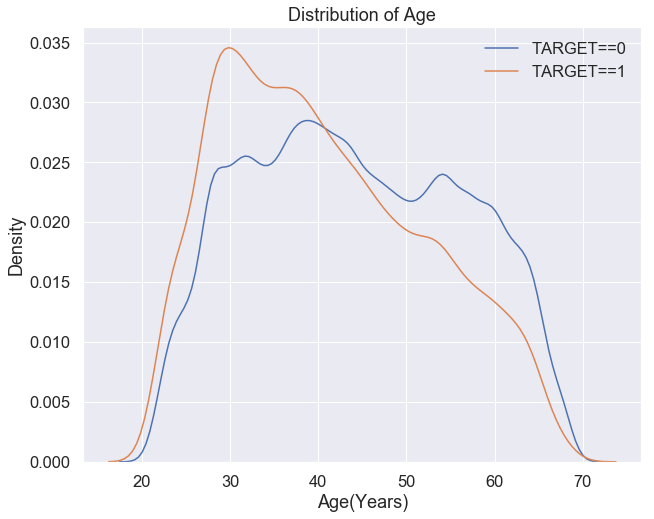

In [28]:
plt.figure(figsize=(10,8))

# kde plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET']==0, 'DAYS_BIRTH']/365, label = 'TARGET==0')

# kde plot of loans that were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET']==1, 'DAYS_BIRTH']/365, label = 'TARGET==1')

# Labeling of plot
plt.xlabel('Age(Years)')
plt.ylabel('Density')
plt.title('Distribution of Age')
plt.show()

* The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

TARGET 이 1일 때 분포가 연령이 어린쪽으로 더 쏠려 있습니다. 상관계수가 -0.07정도로 높지는 않았지만, TARGET에 영향을 미치기 때문에  이 변수는 머신러닝 모델에 유용할 것 같습니다.  이 관계를 연령대별 평균 상환 실패율로 다시 살펴보겠습니다.

* To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

이 그래프를 만들기 위해 우리는 연령을 1개 구간당 5세로 나누어 카테고리를 만들겠습니다. 그리고 각각의 구간에 대해 TARGET의 평균 값을 구할 것입니다. 그 평균값이 연령 구간별로 상환 실패율을 보여줄 것입니다.

In [29]:
# Age Information into a seperate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# 연 단위로 환산한 연령의 최소, 최대값
print("Min Age: ", age_data['YEARS_BIRTH'].min())
print("Max Age: ", age_data['YEARS_BIRTH'].max())

Min Age:  20.517808219178082
Max Age:  69.12054794520547


--> 연령은 20세에서 70세 사이에 분포

* np.linspace 함수
  - numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
  - start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수
  - 요소 개수를 기준으로 균등 간격의 배열을 생성

In [30]:
np.linspace(20, 70, num = 11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [31]:
# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [32]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


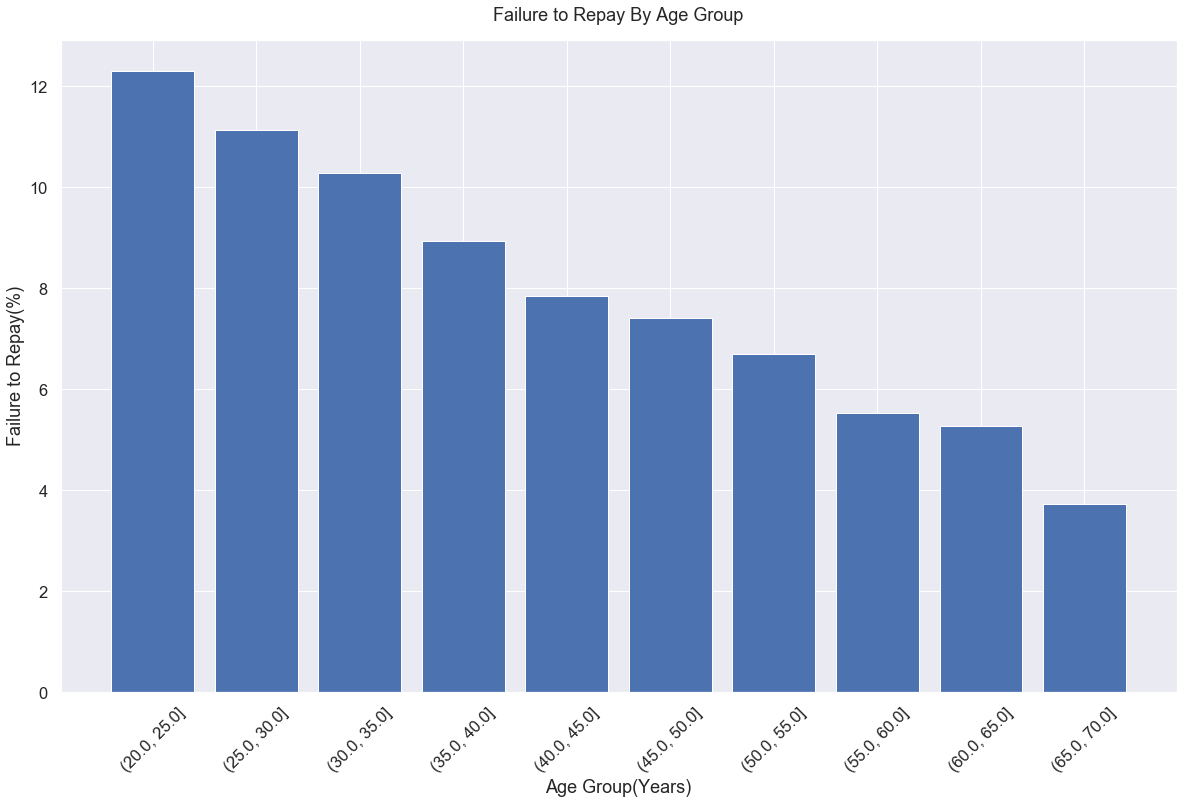

In [33]:
plt.figure(figsize= (20, 12))

# Graph the age bins and the average of the TARGET as a bar plot
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
#sns.barplot(y='TARGET', data=age_groups, x=age_groups.index)

# Plot Labeling
plt.xticks(rotation = 45)
plt.xlabel('Age Group(Years)')
plt.ylabel('Failure to Repay(%)')
plt.title('Failure to Repay By Age Group', y=1.02)
plt.show()

* There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

연령이 어릴 수록 제때 상환하지 못하는 경향이 있습니다. 제일 젋은 3개의 연령 그룹은 상환 실패율이 10%를 넘어가고 제일 연령이 많은 그룹은 5%를 하회합니다.

* This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

이 정보는 은행에 의해 직접 사용될 수 있습니다. 연령이 어릴수록 상환을 잘 하지 못하기 때문에 재정적인 조언이나 다른 지침이 제공되어야 할 것 같습니다. 이것은 은행이 젊은 고객을 차별해야한다는 것을 의미하지 않습니다. 하지만 젋은 층이 제 때 상환할 수 있도록 예방 조치를 취하는 것이 현명할 것입니다.

### Exterior Sources

* The 3 variables with the strongest negative correlations with the target are ```EXT_SOURCE_1```, ```EXT_SOURCE_2```, and ```EXT_SOURCE_3```. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

타겟과 가장 강한 음의 상관관계가 있었던 3개의 변수는  ```EXT_SOURCE_1```, ```EXT_SOURCE_2```, ```EXT_SOURCE_3```입니다. documentation에 따르면 이 feature들은 외부데이터 소스에 의한 정규화된 점수를 나타냅니다. 이것이 정확히 무슨 의미인지는 알 수 없지만 많은 데이터 소스를 이용해서 만들어진 누적적인 신용등급일 것 같습니다.

* Let's take a look at these variables.

이들 변수를 살펴봅시다.

* First, we can show the correlations of the ```EXT_SOURCE``` features with the target and with each other.

먼저 우리는 EXT_SOURCE와 TARGET, 그리고 서로 간의 상관관계를 볼 수 있습니다.

In [34]:
# Extract the EXT_SOURCE variables and show correlations

ext_data = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


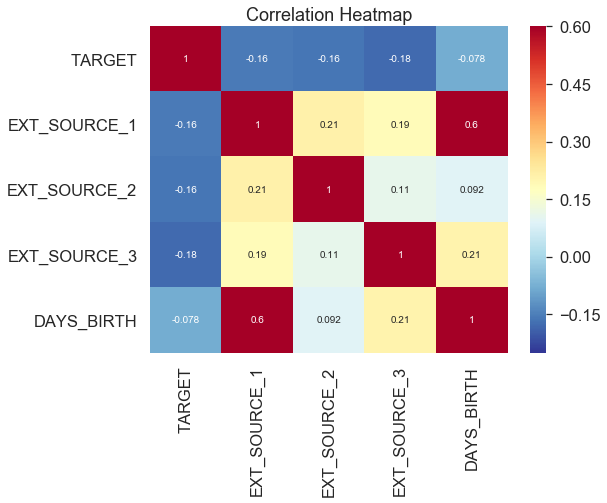

In [35]:
plt.figure(figsize=(8,6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap='RdYlBu_r', vmin = -0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap')
plt.show()

* All three ```EXT_SOURCE``` features have negative correlations with the target, indicating that as the value of the ```EXT_SOURCE``` increases, the client is more likely to repay the loan. We can also see that ```DAYS_BIRTH``` is positively correlated with ```EXT_SOURCE_1``` indicating that maybe one of the factors in this score is the client age.

모든 ```EXT_SORUCE```가 TARGET과 음의 상관관계를 가지고 있고, 이는 ```EXT_SOURCE```값이 증가할 수록, 고객들이 상환을 잘한다는 것을 나타냅니다. 그리고 ```DAYS_BIRTH```와 ```EXT_SOURCE_1```양의 상관관계를 가지고 있는 것을 볼 수 있는데, 이는 ```EXT_SOURCE_1```이 고객의 연령과 관련이 있는 어떤 요소임을 보여줍니다.

* Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

다음으로 각각의 feature들이 TARGET의 값에 따라 어떤 분포를 지니는지 알아봅시다. 이는 이 변수들이 TARGET에 어떤 영향을 가지고 있는지 시각화 해줄 것입니다.

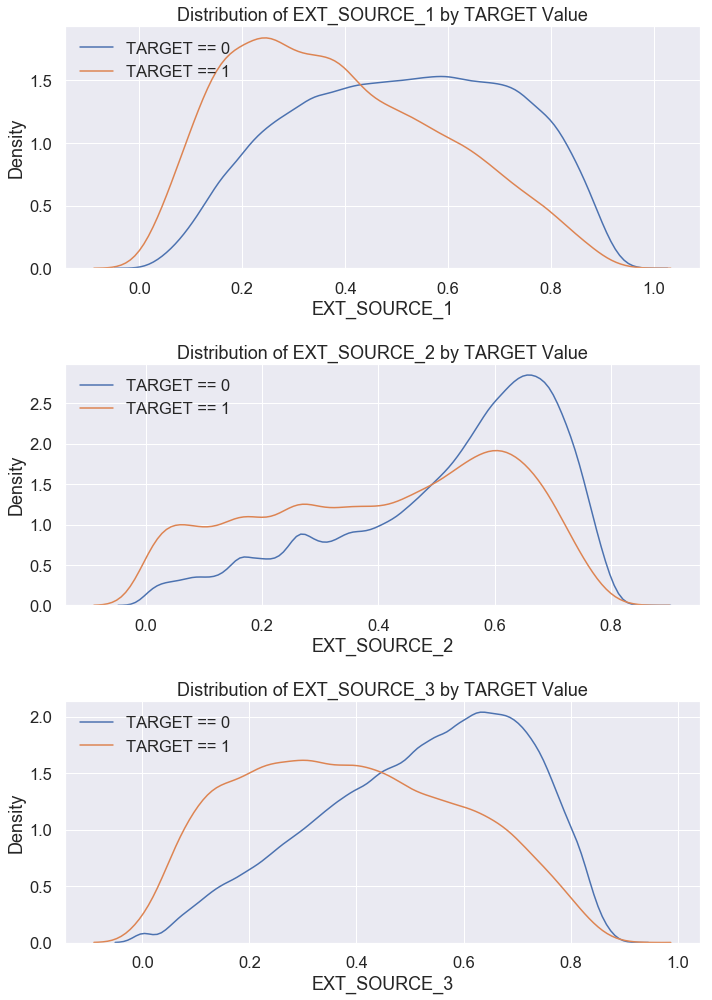

In [36]:
plt.figure(figsize=(10,14))

#iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i+1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET']==0,source], label = 'TARGET == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET']==1,source], label = 'TARGET == 1')
    
    # labe the plots
    plt.title('Distribution of %s by TARGET Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    plt.legend(loc = 'upper left')
    
plt.tight_layout(h_pad = 2.5) # plot간의 간격을 자동으로 맞춰줌(괄호안에 아무것도 입력안해도 어느정도 맞춰줌)

* ```EXT_SOURCE_3``` displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

```EXT_SOURCE_3```이 TARGET 값에 따라 분포의 큰 차이를 보여주고 있습니다. 이 feature가 고객이 대출을 상환할 확률가 어떤 관계가 있음을 알 수 있습니다. 이 관계는 그렇게 강하지는 않습니다.(사실상 약하다고 보이지만, 머신러닝 모델이 대출 상환여부를 예측할 때는 유용할 것입니다.)

## Pairs Plot

* As a final exploratory plot, we can make a pairs plot of the EXT_SOURCE variables and the DAYS_BIRTH variable. The Pairs Plot is a great exploration tool because it lets us see relationships between multiple pairs of variables as well as distributions of single variables. Here we are using the seaborn visualization library and the PairGrid function to create a Pairs Plot with scatterplots on the upper triangle, histograms on the diagonal, and 2D kernel density plots and correlation coefficients on the lower triangle.

EDA 플롯의 마지막으로, EXT_SOURCE 변수들과 DAYS_BIRTH변수의 pair plot을 그려보겠습니다. Pair Plot은 여러쌍의 변수들 간의 관계와 각 개별 변수의 분포를 함께 볼 수 있기 때문에 , EDA에 매우 유용한 툴입니다. seaborn 라이브러리와 PairGrid 함수를 활용해서 대각선으로는 histogram, 상방에는 scatter plot, 하방에는 kde density plot을 볼 수 있는 Pairs Plot을 그려보겠습니다.

* If you don't understand this code, that's all right! Plotting in Python can be overly complex, and for anything beyond the simplest graphs, I usually find an existing implementation and adapt the code (don't repeat yourself)!

이 코드를 이해하지 못해도 괜찮습니다.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


Text(0.5, 1.05, 'EXT_SOURCE and AGE Features Pairs Plot')

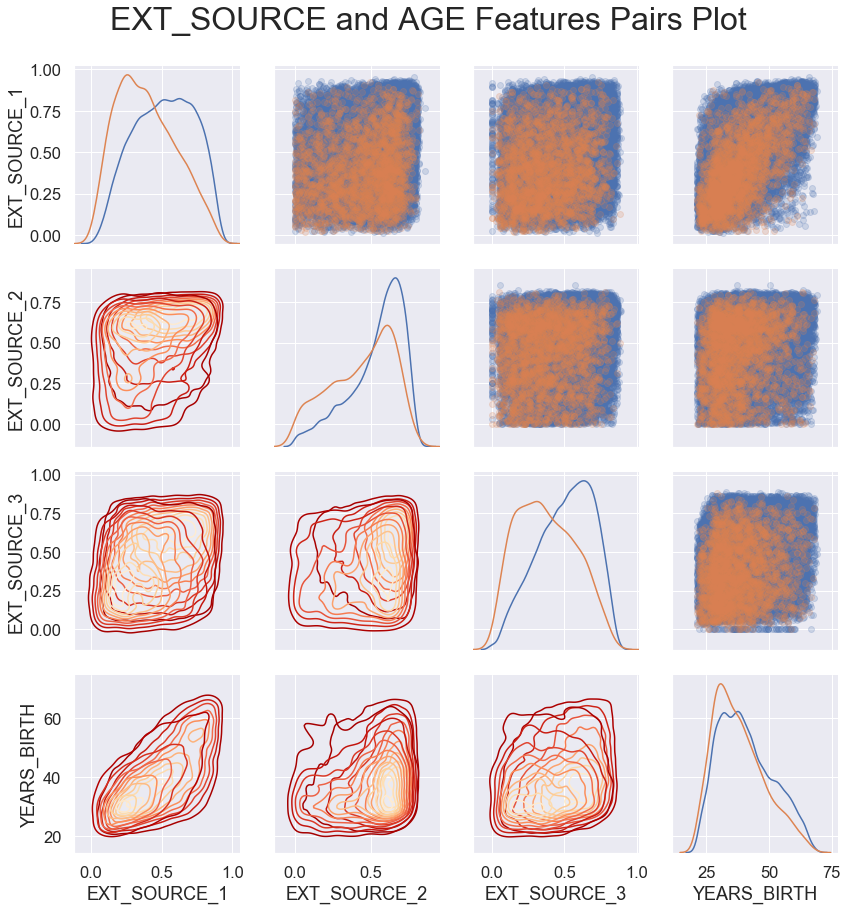

In [37]:
# Copy the data for plotting
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH']  = age_data['YEARS_BIRTH']

# Drop NA values and limit to 1st 100000 rows
plot_data  = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                       xy=(.2, .8), xycoords = ax.transAxes, 
                       size = 20)

# Create the pairgrid object 
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, hue='TARGET',
                            vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Lower is a density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('EXT_SOURCE and AGE Features Pairs Plot', size=32, y=1.05)

* In this plot, the red indicates loans that were not repaid and the blue are loans that are paid. We can see the different relationships within the data. There does appear to be a moderate positive linear relationship between the EXT_SOURCE_1 and the DAYS_BIRTH (or equivalently YEARS_BIRTH), indicating that this feature may take into account the age of the client.

이 도표에서 빨강은 상환되지 못한 대출, 파랑은 상환된 대출을 나타냅니다. ```EXT_SOURCE_1``` 와```DATE_BIRTH```(```YEARS_BIRTH```) 간의 약간의 양의 선형 관계를 볼 수 있습니다. 이는 이 변수가 고객의 연령을 반영할 수도 있다는 것을 보여줍니다.

# Feature Engineering

* Kaggle competitions are won by feature engineering: those win are those who can create the most useful features out of the data. (This is true for the most part as the winning models, at least for structured data, all tend to be variants on gradient boosting). This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning. This is a great article on the subject. As Andrew Ng is fond of saying: "applied machine learning is basically feature engineering."

Kaggle Competiton 은 feature engineering에 의해 승리가 좌우됩니다. 즉, 데이터로부터 가장 유용한 feature를 만들어내는 참가자가 우승을 하게 됩니다. 이는 머신러닝의 한 패턴을 보여줍니다. feature engineering이 모델 빌딩이나 하이퍼파라미터 튜닝보다 더 좋은 성과를 냅니다.

* While choosing the right model and optimal settings are important, the model can only learn from the data it is given. Making sure this data is as relevant to the task as possible is the job of the data scientist (and maybe some automated tools to help us out).

올바른 모델의 선택과 최적의 세팅을 하는 것도 중요하지만 모델은 주어진 데이터로부터 학습을 합니다. 데이터가 주어진 업무와 가능한 관련있게 만드는 것이 데이터 사이언티스트의 일입니다.

* Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.

Feature Engineering은 feature construction(주어진 데이터에서 새로운 feature를 만들기)나 feature selection(가장 중요한 feature를 골라내거나 dimensionality 의 감소를 만들어내는 다른 방법)을 포함한 geneal process를 말합니다. 우리가 feature를 만들어내고 선택하는데 많은 기법들이 있습니다.

* We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods:

다른 데이터 소스를 이용하면 많은 feature engineering을 사용할 것이지만, 이번에는 간단한 두 feature construnction method만을 사용할 것입니다.

  - Polynomial features (다항식 feature)
  - Domain knowledge features (도메인 지식 feature)

## Polynomial Features

* One simple feature construction method is called polynomial features. In this method, we make features that are powers of existing features as well as interaction terms between existing features. 

심플한 feature construction 방법 중 하나는 polynomial feature 입니다. 이 방법에서는 기존 feature의 power와 기존 feature 간의 상호작용을 나타내는 feature를 만들어 냅니다.


* For example, we can create variables ```EXT_SOURCE_1^2``` and ```EXT_SOURCE_2^2``` and also variables such as ```EXT_SOURCE_1``` x ```EXT_SOURCE_2```, ```EXT_SOURCE_1``` x ```EXT_SOURCE_2^2```, ```EXT_SOURCE_1^2``` x  ```EXT_SOURCE_2^2```, and so on. 

예를 들어 ```EXT_SOURCE_1^2``` , ```EXT_SOURCE_2^2``` 나  ```EXT_SOURCE_1``` x ```EXT_SOURCE_2```, ```EXT_SOURCE_1``` x ```EXT_SOURCE_2^2```, ```EXT_SOURCE_1^2``` x  ```EXT_SOURCE_2^2``` 같은 변수들을 만들어 낼 것입니다.

* These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target.

이런 feature들은 여러 개별 변수들의 조합으로 변수들관의 상호작용을 나타내기 때문에 interaction terms 라고 불립니다. 다시 말해, 두 변수가 스스로는 TARGET에 강한 영향을 미치진않지만, 하나의 interaction variable로 결합되었을 때 TARGET과의 상관관계를 보여줍니다.

*  Interaction terms are commonly used in statistical models to capture the effects of multiple variables, but I do not see them used as often in machine learning. Nonetheless, we can try out a few to see if they might help our model to predict whether or not a client will repay a loan.

Interaction Terms는 여러 변수들의 효과를 찾기 위해 통계 모델에서 흔히 사용됩니다. 그렇지만 머신러닝에서는 그렇게 자주 사용되지는 않았습니다. 그럼에도 불구하고, 고객들의 대출 상환여부를 예측하기 위한 모델에 도움을 주는지 볼 것입니다.

* Jake VanderPlas writes about polynomial features in his excellent book Python for Data Science for those who want more information.

Jake Vander Plas는 Polynomial feature에 관해 거의 책에서 기술하였습니다. (파이썬 머신러닝 핸드북)

* In the following code, we create polynomial features using the ```EXT_SOURCE``` variables and the ```DAYS_BIRTH``` variable. Scikit-Learn has a useful class called PolynomialFeatures that creates the polynomials and the interaction terms up to a specified degree. We can use a degree of 3 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into problems with overfitting).

아래의 코드에서 ```EXT_SOURCE```와 ```DAYS_BIRTH``` 변수를 활용해서 polynomial feature를 만들 것입니다. 사이킷런에서는 ```PolynomialFeatures```라 불리는 유용한 feature가 있는데, 그것을 이용해서 polynomial과 interaction term를 지정된 정도까지 생성할 수 있습니다. degree를 3을 지정해서 결과를 보겠습니다. (polynomial feature를 만들 때 너무 높은 degree를 설정하는 것은 피합니다. degree 값에 따라 feature의 수가 기하급수적으로 증가하고, overfitting 되기 때문입니다.

In [38]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH', 'TARGET']]
poly_features_test = app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

In [39]:
# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns =['TARGET'])

In [40]:
# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [42]:
# Train the polynomial Features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


* This creates a considerable number of new features. To get the names, we have to use the polynomial features ```get_feature_names``` method.

상당히 많은 수의 새로운 feature를 만들었습니다. polynomial features의 ```get_feature_names``` 메소드를 사용해서 이름을 얻겠습니다.

In [43]:
poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]
# 35개의 이름을 생성하고 너무 기니깐 15개까지만 한번 보기

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

* There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [44]:
# Create a dataframe of the features
poly_features = pd.DataFrame(poly_features, 
                             columns=poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the TARGET
poly_features['TARGET'] = poly_target

In [45]:
# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and mostw positive
print(poly_corrs.head(10))
print('----------------------------')
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
----------------------------
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


* Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn.

많은 새로운 feature들이 절대 값으로 보았을 때 원 feature보다 높은 상관관계를 가지고 있습니다. 머신러닝 모델을 만들 때 이 feature들을 포함하고 제외하면서 이것들이 모델 학습에 도움이 되는지 볼 수 있습니다.


* We will add these features to a copy of the training and testing data and then evaluate models with and without the features. Many times in machine learning, the only way to know if an approach will work is to try it out!

훈련 데이터 셋과 테스트 데이터셋에 이 feature들을 더하고, 이 feature들을 포함하고, 또 제외하면서 모델을 평가할 것입니다. 어떤 방법이 효과가 있는지 아는 유일한 방법은 시도해보는 것입니다.

In [46]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns=poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how = 'left')


# Merge polynomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on='SK_ID_CURR', how='left')

In [47]:
# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis=1)

# print out the new shape
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape: ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:  (48744, 275)


## Domain Knowledge Features

* Maybe it's not entirely correct to call this "domain knowledge" because I'm not a credit expert, but perhaps we could call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by this script by Aguiar:

credit expert가 아니기 때문에 domain knowledge라 불리기엔 정확하지는 않습니다.  하지만  제한적인 금융지식을 적용해보았습니다. 우리가 생각하기에 고객이 채무불이행을 할지 안할지 결정하는데 중요한 요소가 되는 feature를 만들 것입니다. 여기서 Aguiar의 script를 참고하여 다섯개의 feature 사용할 것입니다. 
(https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features)

* ```CREDIT_INCOME_PERCENT```: the percentage of the credit amount relative to a client's income
    - 고객의 소득 대비 상대적인 신용금액 퍼센트 비율

* ```ANNUITY_INCOME_PERCENT```: the percentage of the loan annuity relative to a client's income
    - 고객의 소득 대비 대출 연액의 퍼센트 비율


* ```CREDIT_TERM```: the length of the payment in months (since the annuity is the monthly amount due
     - 월 기준 납입기간 (연금이 월납이기 떄문에)


* ```DAYS_EMPLOYED_PERCENT```: the percentage of the days employed relative to the client's age
     - 고객의 연령 대비 근로 일수의 비율
     
 Again, thanks to Aguiar and his great script for exploring these features

In [48]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [49]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY']/app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

### Visualize New Variables

* We should explore these domain knowledge variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the ```TARGET ```.

이 domain knowledge variables를 시각화해서 보겠습니다. KDE plot을 TARGET 값에 따라 색을 달리해서 그려보겠습니다.

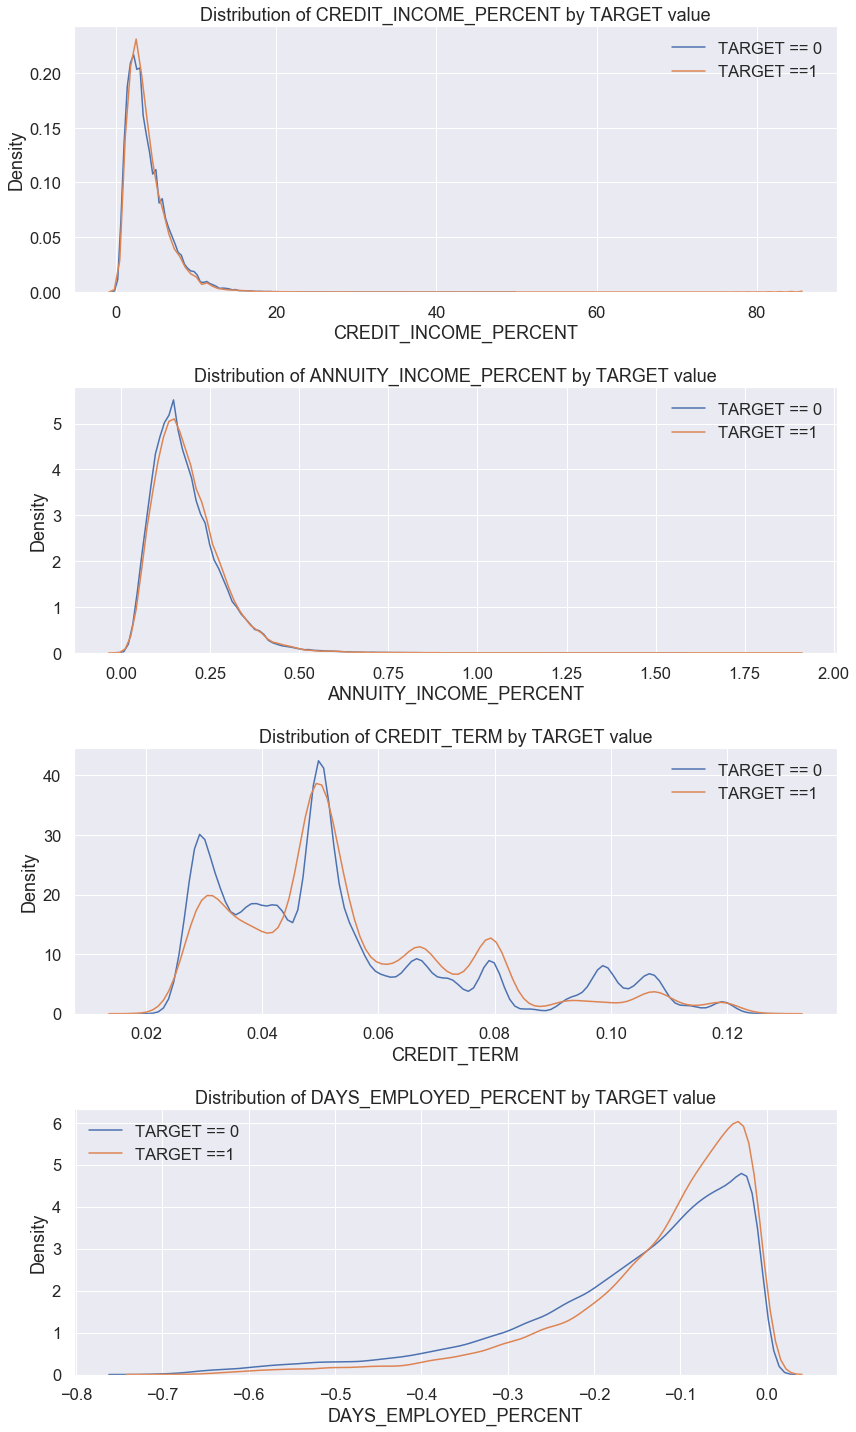

In [50]:
plt.figure(figsize=(12, 20))

#iterate through the new features

for i, feature in enumerate(['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT', 
                                             'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i+1)
    
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0, feature], label = 'TARGET == 0')
    
    # plot loans that were not paid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1, feature], label = 'TARGET ==1')
    
    # label the plots
    plt.title('Distribution of %s by TARGET value' % feature)
    plt.xlabel('%s' % feature)
    plt.ylabel('Density')
    plt.tight_layout(h_pad=2.5)

* It's hard to say ahead of time if these new features will be useful. The only way to tell for sure is to try them out!

새로운 feature들이 유용하지는 않은 것 같지만 적용해봐야 확실히 말할 수 있습니다.

# Baseline

* For a naive baseline, we could guess the same value for all examples on the testing set. We are asked to predict the probability of not repaying the loan, so if we are entirely unsure, we would guess 0.5 for all observations on the test set. This will get us a Reciever Operating Characteristic Area Under the Curve (AUC ROC) of 0.5 in the competition (random guessing on a classification task will score a 0.5).

naive baseline에서는 테스트 데이터셋의 모든 예에 대해 같은 값을 추측할 수 있습니다. 고객이 대출을 상환할 확률을 예측해야 해야하는데, 우리가 완전히 불확실하다면,테스트 데이터셋의 관측치들에 대해 0.5를 예상할 것입니다.  이렇게 했을 때 ROC AUC 는 0.5가 될 것입니다.

# Logistic Regression Implementation

* Here I will focus on implementing the model rather than explaining the details, but for those who want to learn more about the theory of machine learning algorithms, I recommend both An Introduction to Statistical Learning and Hands-On Machine Learning with Scikit-Learn and TensorFlow. Both of these books present the theory and also the code needed to make the models (in R and Python respectively). They both teach with the mindset that the best way to learn is by doing, and they are very effective!

이번에는 디테일한 설명보다는 모델을 실행하는데에만 초점을 두겠습니다. 머신러닝 알고리즘의 이론에 대해 보다 더 알고 싶으면 An Introduction to Statistical Learning 와 Hands-On Machine Learning with Scikit-Learn and TensorFlow 책을 참고하기를 추천합니다. 두 책 모두 이론과 코드가 잘 기술되있습니다. 

* To get a baseline, we will use all of the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.

categorical variable을 모두 encoding 한 다음 모든 feature를 사용할 것입니다. 그리고 결측치 데이터를 채워주는 것(Imputing)과 featurea의 범위를 정규화(feature scaling)하는 전처리를 할 것입니다. 

In [51]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the traning data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

#Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy='median')

# Scale each feature to 0 - 1
scaler = MinMaxScaler(feature_range= (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both traning and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)


print('Traning data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Traning data shape:  (307511, 240)
Testing data shape:  (48744, 240)


* We will use LogisticRegression from Scikit-Learn for our first model. The only change we will make from the default model settings is to lower the regularization parameter, C, which controls the amount of overfitting (a lower value should decrease overfitting). This will get us slightly better results than the default LogisticRegression, but it still will set a low bar for any future models.

첫 모델로 사이킷런의 LogisticRegression을 사용합니다. 기본 모델 세팅에서의 유일한 변경은 오버피팅의 양을 조절하는 regularization parameter인 C (값이 낮으면 오버피팅을 줄여줍니다.)입니다. 이를 통해 기본 Logistics Regression 보다 좋은 결과를 얻을 수 있을 것입니다. 하지만 후에 할 모델이 더 좋을 것입니다.

* Here we use the familiar Scikit-Learn modeling syntax: we first create the model, then we train the model using .fit and then we make predictions on the testing data using .predict_proba (remember that we want probabilities and not a 0 or 1).

사이킥런 모델링에서 친숙한 표현입니다: 우리는 먼저 모델을 만들고, 그 다음 ```.fit```을 사용해서 학습을 시키고, 테스트 데이터 셋에 대해 ```.predict_proba```를 이용해서 예측을 할것입니다. (0과 1을 예측하는게 아니라 확률을 예측합니다.)

In [52]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization prameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the traning data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

* Now that the model has been trained, we can use it to make predictions. We want to predict the probabilities of not paying a loan, so we use the model predict.proba method. This returns an m x 2 array where m is the number of observations. The first column is the probability of the target being 0 and the second column is the probability of the target being 1 (so for a single row, the two columns must sum to 1). We want the probability the loan is not repaid, so we will select the second column.

모델이 학습됐기 때문에 예측을 할 수 있습니다. 대출을 상환하지 못할 확률을 예측하기 때문에 ```.predict_proba```메소드를 이용합니다. 이 방법은 m * 2 array를 반환합니다. (m은 관측치의 수) 첫번쨰 컬럼은 TARGET이 0이 될 확률, 두번째 컬럼은 1이 될 확률 입니다. (즉, 한 행의 합은 1입니다.). 대출이 상환되지 못할 확률을 구해야하기 때문에 두번째 컬럼을 선택할 것입니다.

* The following code makes the predictions and selects the correct column.

아래는 예측을 하고 정확한 컬럼을 선택하는 코드입니다.

In [53]:
# Make Predictions
# Make sure to select the second columns only
log_reg_pred = log_reg.predict_proba(test)[: , 1]

* The predictions must be in the format shown in the sample_submission.csv file, where there are only two columns: SK_ID_CURR and TARGET. We will create a dataframe in this format from the test set and the predictions called submit.

예측치는 sample_submission.csv 파일과 동일한 형식이어야 합니다. 해당 파일은 SK_ID_CURR과 TARGET 두 컬럼으로만 이루어져있습니다. 테스트 데이터 셋으로부터 이 양식의 데이터 프레임을 만들어 제출할 것입니다.

In [54]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [55]:
# submission of dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.087750
1,100005,0.163957
2,100013,0.110238
3,100028,0.076575
4,100038,0.154924


* The predictions represent a probability between 0 and 1 that the loan will not be repaid. If we were using these predictions to classify applicants, we could set a probability threshold for determining that a loan is risky.

예측치는 대출이 상환되지 못할 0과 1사이의 확률로 주어졌습니다. 우리가 고객들을 분류해야했다면, 어떤 대출이 위험한지를 결정하는 확률의 경계를 설정해야 합니다.

In [56]:
# save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index=False)

* The submission has now been saved to the virtual environment in which our notebook is running. To access the submission, at the end of the notebook, we will hit the blue Commit & Run button at the upper right of the kernel. This runs the entire notebook and then lets us download any files that are created during the run.

submission은 우리의 노트북 가상공간에 저장이 되어있습니다. 제출하기 위해서는 노트북 마지막에 파란색의 커널 우측 상단의 "Commit & Run Button"을 눌러야 합니다. 이것은 전체 노트북을 실행하고 런을 통해 만들어진 파일을 다운로드하게 해줍니다. 

* Once we run the notebook, the files created are available in the Versions tab under the Output sub-tab. From here, the submission files can be submitted to the competition or downloaded. Since there are several models in this notebook, there will be multiple output files.

노트북을 실행하면, Output sub-tab 아래 Versions 탭에 파일이 생성됩니다.  여기에서 제출 파일을 제출하거나 다운로드 할 수 있습니다. 이 노트북에는 여러 모델이 있기 때문에 여러 아웃풋 파일이 있을 것입니다.

* The logistic regression baseline should score around 0.671 when submitted.

Logistinc Regression baseline의 점수는 0.671을 기록했습니다.

# Improved Model : Random Forest

* To try and beat the poor performance of our baseline, we can update the algorithm. Let's try using a Random Forest on the same training data to see how that affects performance. The Random Forest is a much more powerful model especially when we use hundreds of trees. We will use 100 trees in the random forest.

베이스라인의 낮은 퍼포먼스를 넘기려면, 알고리즘을 업데이트 해야합니다. 같은 훈련 데이터셋에 대해 Random Forest 를 사용해서 퍼포먼스가 어떤지 보겠습다. Random Forest는 우리가 수백개의 트리를 사용할 때 훨씬 더 강력한 모델이 됩니다. 100개의 트리를 사용한 Random Forest를 적용하겠습니다.

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Make random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state = 50, verbose=1, n_jobs = -1)

In [58]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'Feature' : features, 'importances' : feature_importance_values})

# Make Predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [59]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET']  = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index=False)

* These predictions will also be available when we run the entire notebook.

이 예측값들은 전체 노트북을 실행했을 때 사용 가능합니다.

* This model should score around 0.678 when submitted.

 # Make Predictions using Engineered Features

* The only way to see if the Polynomial Features and Domain knowledge improved the model is to train a test a model on these features! We can then compare the submission performance to that for the model without these features to gauge the effect of our feature engineering.

Polynomial Feature와 Domain knowledge가 모델을 향상시키는지 알 수 있는 유일한 방법은 이 feature들로 훈련을 시켜 보는 것이다. 이 feature들 없이 학습한 모델과 비교하면서 feature engineering의 효과를 볼 것입니다.

In [67]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [68]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [69]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index=False)

* This model scored 0.678 when submitted to the competition, exactly the same as that without the engineered features. Given these results, it does not appear that our feature construction helped in this case.

이 모델은 0.678의 점수를 기록해 engineered feature가 없을 때와 같은 결과가 나왔습니다. 이 결과로 보아 이 feature들은 이번 케이스에 도움이 되지 않습니다.